In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from dict_func import conf_accuracy

In [2]:
common_colors_g = ["black", "white", "red", "green", "yellow", "blue", "brown", "orange", "pink", "purple", "gray", "grey"]
common_colors = ["black", "white", "red", "green", "yellow", "blue", "brown", "orange", "pink", "purple", "gray"]


In [3]:
dataset = pd.read_csv('combined_dicts.csv')
dataset

,ColorName,R,G,B
0,blue,201,255,229
1,white,245,233,211
2,green,226,243,236
3,white,255,254,236
4,brown,46,25,5
...,...,...,...,...
179311,yellow,251,255,0
179312,yellow,252,255,0
179313,yellow,253,255,0
179314,yellow,254,255,0


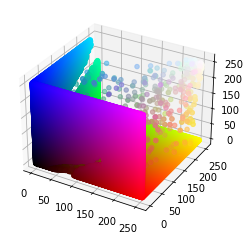

In [4]:
import matplotlib.pyplot as plt
r = pd.to_numeric(dataset['R'])
g = pd.to_numeric(dataset['G']) 
b = pd.to_numeric(dataset['B'])
#c = dataset['ColorName'].to_numpy()
r1 = dataset.R.to_numpy()
r1 = r1.astype(int)


g1 = dataset.G.to_numpy()
g1 = g1.astype(int)


b1 = dataset.B.to_numpy()
b1 = b1.astype(int)

c1 = np.column_stack((r1,g1,b1))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(r, g, b, c =c1/255.0)

In [5]:
Data = dataset.drop(columns = 'ColorName').values.tolist()
labels = dataset.drop(columns = ['R', 'G', 'B']).values.tolist()
labels = np.array(labels)
labels = np.ravel(labels, order = 'C')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=0.3)

X_s = preprocessing.StandardScaler().fit(Data).transform(Data)
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, labels, test_size=0.3)

X_n = preprocessing.Normalizer().fit(Data).transform(Data)
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, labels, test_size=0.3)

In [13]:
"""
print(X_s)
print(X_n)
"""

'\nprint(X_s)\nprint(X_n)\n'

In [14]:
from sklearn import svm

clf_linear = clf_s = clf_n = clf_raw = svm.SVC(kernel='linear') # Linear Kernel

clf_raw.fit(X_train, y_train)
clf_s.fit(X_s_train, y_s_train)
clf_n.fit(X_n_train, y_n_train)


scores_raw = cross_val_score(clf_raw, X_test, y_test, cv=5)
scores_s = cross_val_score(clf_s, X_s_test, y_s_test, cv=5)
scores_n = cross_val_score(clf_n, X_n_test, y_n_test, cv=5)

print(scores_raw)
print(scores_raw.mean(), scores_raw.std())
print(scores_s)
print(scores_s.mean(), scores_s.std())
print(scores_n)
print(scores_n.mean(), scores_n.std())

[0.98968306 0.99051957 0.99144902 0.99275026 0.99144902]
0.9911701831025189 0.0010282975507715589
[0.99061251 0.99135607 0.98986895 0.99321498 0.99135607]
0.9912817176317501 0.0011128639871434839
[0.85788642 0.85398271 0.86113951 0.86188307 0.86021006]
0.8590203550515847 0.002855346879437826


In [15]:
y_raw = clf_raw.predict(X_test)
cm_raw = confusion_matrix(y_test, y_raw,  labels = common_colors)
print(conf_accuracy(cm_raw))

y_s = clf_s.predict(X_s_test)
cm_s = confusion_matrix(y_s_test, y_s,  labels = common_colors)
print(conf_accuracy(cm_s))

y_n = clf_n.predict(X_n_test)
cm_n = confusion_matrix(y_n_test, y_n,  labels = common_colors)
print(conf_accuracy(cm_n))

0.7943117390092016
0.46900269541778977
0.8594850822567153


In [7]:
X_train, X_test, y_train, y_test = X_s_train, X_s_test, y_s_train, y_s_test

In [17]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernels:
    clf_kernels = svm.SVC(kernel = k)
    clf_kernels.fit(X_train, y_train)
    scores_kernels = cross_val_score(clf_kernels, X_test, y_test, cv=5)
    print("Kernel = ", k)
    print("scores = ", scores_kernels)
    print(scores_kernels.mean(), scores_kernels.std())
    y_kernels = clf_kernels.predict(X_test)
    cm_kernels = confusion_matrix(y_test, y_kernels,  labels = common_colors)
    print("confusion matrix accuracy = ",conf_accuracy(cm_kernels))


Kernel =  linear
scores =  [0.99061251 0.99135607 0.98986895 0.99321498 0.99135607]
0.9912817176317501 0.0011128639871434839
confusion matrix accuracy =  0.9918208011897016
Kernel =  poly
scores =  [0.99014778 0.99070546 0.98893949 0.99172786 0.9918208 ]
0.9906682777209778 0.001068832159975069
confusion matrix accuracy =  0.9919509248071382
Kernel =  rbf
scores =  [0.99163491 0.9918208  0.98968306 0.99237847 0.99191375]
0.9914861976020077 0.0009342750718935786
confusion matrix accuracy =  0.9933451064225299
Kernel =  sigmoid
scores =  [0.80286272 0.81475974 0.78455247 0.78576076 0.80620876]
0.7988288874430709 0.011824705890347986
confusion matrix accuracy =  0.7893484524584069


In [8]:
var_c = 10  ** (-6)
for i in range(10) :
    var_c *= 10
    clf_c = svm.SVC(kernel='rbf', C=var_c) # Linear Kernel
    clf_c.fit(X_train, y_train)
    scores_c = cross_val_score(clf_c, X_test, y_test, cv=5)
    print(clf_c)
    print(scores_c)
    print(scores_c.mean(), scores_c.std())
    """
    y_linear = clf_linear.predict(X_test)
    cm_linear = confusion_matrix(y_test, y_linear,  labels = common_colors)
    print("confusion matrix accuracy = ",conf_accuracy(cm_linear))
    """

SVC(C=9.999999999999999e-06)
[0.28748025 0.28748025 0.28757319 0.28757319 0.28757319]
0.28753601635839765 4.5533780886385725e-05
SVC(C=9.999999999999999e-05)
[0.3843294  0.38711776 0.39074263 0.38981318 0.38656009]
0.3877126126963472 0.0023117831346958742
SVC(C=0.001)
[0.82814388 0.83214053 0.82786504 0.82730737 0.8226601 ]
0.8276233850729622 0.0030155603683455563
SVC(C=0.01)
[0.96403011 0.9672832  0.96719026 0.97183753 0.96579608]
0.967227437494191 0.002589560737085057
SVC(C=0.1)
[0.98605818 0.98652291 0.98698764 0.9867088  0.98791709]
0.9868389255507017 0.0006182094673599961
SVC()
[0.99126313 0.99098429 0.99172786 0.99135607 0.99098429]
0.9912631285435449 0.0002757207356481267
SVC(C=10.0)
[0.99340087 0.99275026 0.99340087 0.9928432  0.99265731]
0.9930105028348359 0.00032411182775657886
SVC(C=100.0)
[0.99395855 0.99349382 0.99302909 0.99302909 0.99423738]
0.9935495863927875 0.0004868779943752573
SVC(C=1000.0)
[0.99451622 0.99367971 0.99377266 0.99330793 0.9938656 ]
0.9938284227158658 

In [19]:
from sklearn.neural_network import MLPClassifier
for i in range(6, 16):
    clf_mlp = MLPClassifier(hidden_layer_sizes=(i), max_iter=10000)
    clf_mlp.fit(X_train, y_train)
    scores_mlp = cross_val_score(clf_mlp, X_test, y_test, cv=5)
    print('n=',i,scores_mlp)
    print(scores_mlp.mean(), scores_mlp.std())
    y_mlp = clf_mlp.predict(X_test)
    cm_mlp = confusion_matrix(y_test, y_mlp,  labels = common_colors)
    print("confusion matrix accuracy = ",conf_accuracy(cm_mlp))


n= 6 [0.99228553 0.99312204 0.99005484 0.99228553 0.99135607]
0.9918208011897016 0.001044964723305529
confusion matrix accuracy =  0.9919881029835487
n= 7 [0.99117018 0.99349382 0.99098429 0.99209964 0.9907984 ]
0.9917092666604702 0.0009982876908335547
confusion matrix accuracy =  0.9927316665117576
n= 8 [0.99256436 0.99247142 0.99051957 0.9907984  0.99330793]
0.9919323357189329 0.001082963967924866
confusion matrix accuracy =  0.9919695138953434
n= 9 [0.99200669 0.99191375 0.98931127 0.99377266 0.99228553]
0.991857979366112 0.0014394245325852495
confusion matrix accuracy =  0.9914861976020076
n= 10 [0.99089135 0.99358676 0.99126313 0.99265731 0.99098429]
0.9918765684543175 0.001065594248384917
confusion matrix accuracy =  0.9929919137466308
n= 11 [0.99144902 0.99367971 0.99154196 0.99340087 0.99219258]
0.9924528301886791 0.0009283383949574626
confusion matrix accuracy =  0.9933451064225299
n= 12 [0.99172786 0.99414444 0.99163491 0.99377266 0.99330793]
0.9929175573938098 0.001043972196

In [9]:
from sklearn.neighbors import (KNeighborsClassifier,NeighborhoodComponentsAnalysis)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
scores_knn = cross_val_score(knn, X_test, y_test, cv=5)
print(scores_knn)
print(scores_knn.mean(), scores_knn.std())

[0.99302909 0.99256436 0.99163491 0.99228553 0.99117018]
0.9921368156891905 0.0006614163723267061


In [21]:
y_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_knn,  labels = common_colors)
print("confusion matrix accuracy = ",conf_accuracy(cm_knn))

confusion matrix accuracy =  0.9936425318338136


In [8]:
clf_best = svm.SVC(kernel='rbf', C=10000)
clf_best.fit(X_train, y_train)
clf_mlp = MLPClassifier(hidden_layer_sizes= 15)
clf_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=15)

In [11]:
y_pred_mlp = clf_mlp.predict(X_test)
cm_mlp = confusion_matrix(y_test, y_pred_mlp,  labels = common_colors)

In [12]:
y_pred_best = clf_best.predict(X_test)
cm_best = confusion_matrix(y_test, y_pred_best,  labels = common_colors)

In [13]:
print(common_colors)
print(cm_best)

acc_best = conf_accuracy(cm_best)
acc_mlp = conf_accuracy(cm_mlp)
print(acc_best)
print(acc_mlp)

['black', 'white', 'red', 'green', 'yellow', 'blue', 'brown', 'orange', 'pink', 'purple', 'gray']
[[  519     1     0     7     0     4     4     0     0     3     0]
 [    0     8     0     0     0     0     0     0     2     0     0]
 [    0     0  4563     0     0     0    11    12    13     1     0]
 [    2     2     0 15504    18     4     1     0     0     0     1]
 [    0     1     0    22  2449     0     1     8     0     0     0]
 [    9     1     0     3     0 12992     0     0     0    27     0]
 [    3     0     5     1     0     0  3110     9     0     3     2]
 [    0     1     8     0     9     0    10  2660     0     0     0]
 [    0     1    15     0     0     0     0     0  3802    18     0]
 [    4     0     1     0     0    24     0     0    32  7865     1]
 [    2     0     0     2     0     2     1     0     0     0    11]]
0.9942002044799703
0.992601542894321


In [23]:
n = 256
X = np.zeros((256**3,3))
for i in range(n):
    for j in range(n):
        for k in range(n):
            X[i*65536+j*256+k][0] = i
            X[i*65536+j*256+k][1] = j
            X[i*65536+j*256+k][2] = k

In [24]:
X
X.shape

(16777216, 3)

In [25]:
X_stan = preprocessing.StandardScaler().fit(X).transform(X)


In [26]:
y = clf_best.predict(X_stan)

In [27]:
count = [0]*11
for i in y:
    for j, item in enumerate(common_colors):
        if i == item:
            count[j] += 1
print(common_colors)
print(count)

['black', 'white', 'red', 'green', 'yellow', 'blue', 'brown', 'orange', 'pink', 'purple', 'gray']
[924061, 7931, 1259431, 4120439, 863997, 3758144, 1422138, 602271, 1105968, 2394515, 318321]


In [28]:
y_df = pd.DataFrame(y,columns=['c'])
X_df = pd.DataFrame(X,columns=['R', 'G', 'B'])
f_df = y_df.join(X_df)
print(f_df)
f_df.to_csv('complete_data.csv', index=False)

              c      R      G      B
0         black    0.0    0.0    0.0
1         black    0.0    0.0    1.0
2         black    0.0    0.0    2.0
3         black    0.0    0.0    3.0
4         black    0.0    0.0    4.0
...         ...    ...    ...    ...
16777211   pink  255.0  255.0  251.0
16777212   pink  255.0  255.0  252.0
16777213   pink  255.0  255.0  253.0
16777214   pink  255.0  255.0  254.0
16777215   pink  255.0  255.0  255.0

[16777216 rows x 4 columns]


In [40]:
import numpy as np
n = 256
X1 = np.zeros((n*n,3),dtype=int)

#bottom
for j in range(n):
    for k in range(n):
        X1[j*n+k][0] = 0
        X1[j*n+k][1] = j
        X1[j*n+k][2] = k


In [41]:
n = 256
X2 = np.zeros((n*n,3),dtype=int)

#top
for j in range(n):
    for k in range(n):
        X2[j*n+k][0] = n-1
        X2[j*n+k][1] = j
        X2[j*n+k][2] = k

X_a = np.append(X1, X2, axis=0)

In [42]:
n = 256
X3 = np.zeros((n*n,3),dtype=int)

#face k = 0,loop i,j
for i in range(n):
    for j in range(n):
        X3[i*n+j][0] = i
        X3[i*n+j][1] = j
        X3[i*n+j][2] = 0

X_a = np.append(X_a, X3, axis=0)

In [43]:
n = 256
X4 = np.zeros((n*n,3),dtype=int)

#face k = n,loop i,j
for i in range(n):
    for j in range(n):
        X4[i*n+j][0] = i
        X4[i*n+j][1] = j
        X4[i*n+j][2] = n-1


X_a = np.append(X_a, X4, axis=0)

In [44]:
n = 256
X5 = np.zeros((n*n,3),dtype=int)

#face j = 0,loop i,k
for i in range(n):
    for k in range(n):
        X5[i*n+k][0] = i
        X5[i*n+k][1] = 0
        X5[i*n+k][2] = k

X_a = np.append(X_a, X5, axis=0)

In [45]:
n = 256
X6 = np.zeros((n*n,3),dtype=int)

#face j = 0,loop i,k
for i in range(n):
    for k in range(n):
        X6[i*n+k][0] = i
        X6[i*n+k][1] = n-1
        X6[i*n+k][2] = k

X_a = np.append(X_a, X6, axis=0)

In [46]:
np.savetxt('nptest', X_a)
print(X_a.shape)

(393216, 3)


In [47]:
print(X_a)

[[  0   0   0]
 [  0   0   1]
 [  0   0   2]
 ...
 [255 255 253]
 [255 255 254]
 [255 255 255]]


In [48]:
X_a_s = preprocessing.StandardScaler().fit(X_a).transform(X_a)
y_vis = clf_best.predict(X_a_s)
"""cy_vis = y_vis
for i, row in np.ndenumerate(cy_vis):
    cy_vis[i] = visual_dict[row]"""

y_vis_df = pd.DataFrame(y_vis,columns=['c'])
X_a_df = pd.DataFrame(X_a,columns=['R', 'G', 'B'])
f_vis_df = y_vis_df.join(X_a_df)
print(f_vis_df)
f_vis_df.to_csv('visualize_data.csv', index=False)

            c    R    G    B
0       black    0    0    0
1       black    0    0    1
2       black    0    0    2
3       black    0    0    3
4       black    0    0    4
...       ...  ...  ...  ...
393211   gray  255  255  251
393212   gray  255  255  252
393213   gray  255  255  253
393214   gray  255  255  254
393215   gray  255  255  255

[393216 rows x 4 columns]
